In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [18]:
data = pd.read_excel("./data/Incendios-Forestales-2021.xlsx")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   no.                      250 non-null    int64  
 1   Municipio                250 non-null    object 
 2   Provincia                250 non-null    object 
 3   Mes de origen            250 non-null    object 
 4   Dia de origen            250 non-null    int64  
 5   Mes de extincion         250 non-null    object 
 6   Dia extincion            250 non-null    int64  
 7   Causas                   250 non-null    object 
 8   Area Afectada en Tareas  250 non-null    int64  
 9   Metros Cuadrados         250 non-null    float64
 10  Mes de origen .1         250 non-null    int64  
 11  Fecha origen             250 non-null    object 
 12  Fecha Extincion          250 non-null    object 
 13  Fecha Mes                250 non-null    object 
dtypes: float64(1), int64(5), o

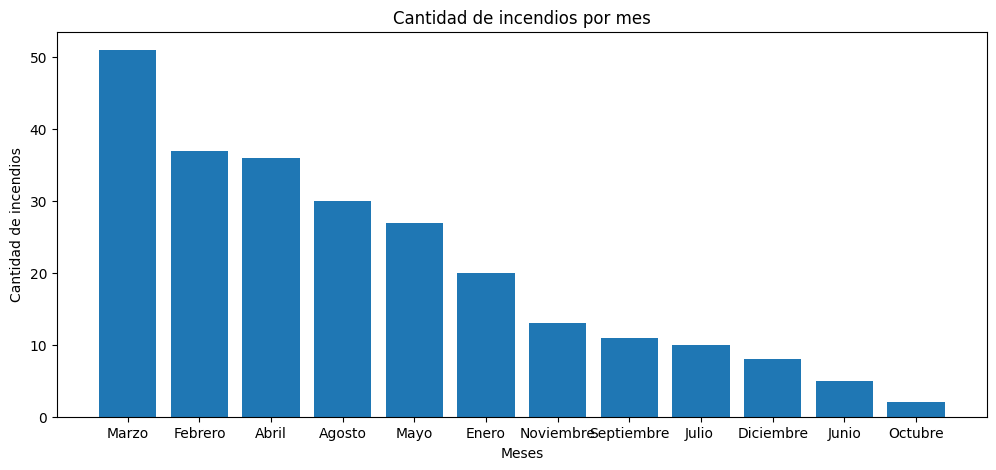

In [79]:
#¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?

def fr_mes(fire):
    #Crea una serie con la cantidad de incendios por mes 
    fire_mes = pd.Series(fire["Mes de origen "].value_counts())

    #Grafica la informacion obtenida
    plt.figure(figsize=(12, 5))
    plt.bar(fire_mes.index, fire_mes.values)
    plt.title("Cantidad de incendios por mes")
    plt.xlabel("Meses")
    plt.ylabel("Cantidad de incendios")
    plt.show()


fr_mes(data)

Duracion en Dias
0    157
1     75
2     12
3      3
6      2
Name: count, dtype: int64


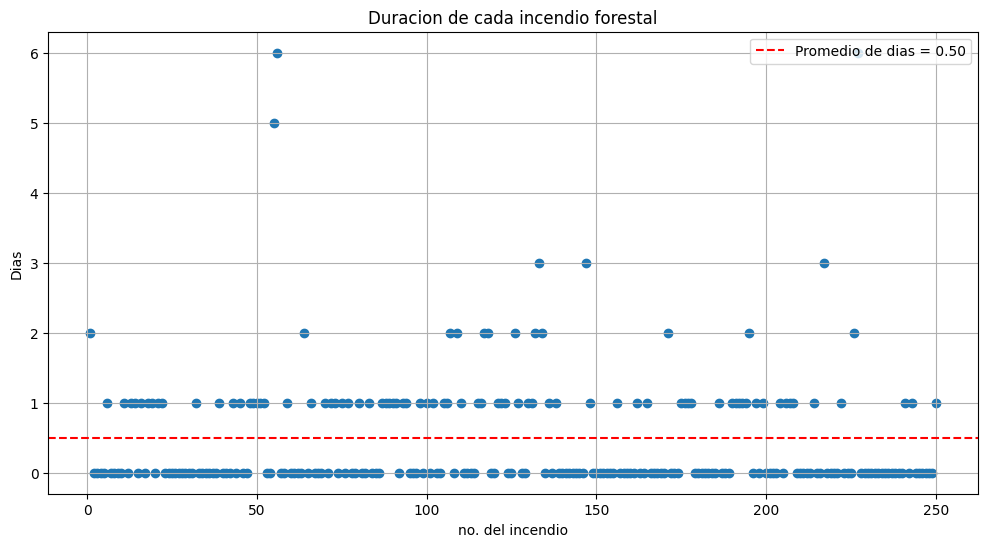

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


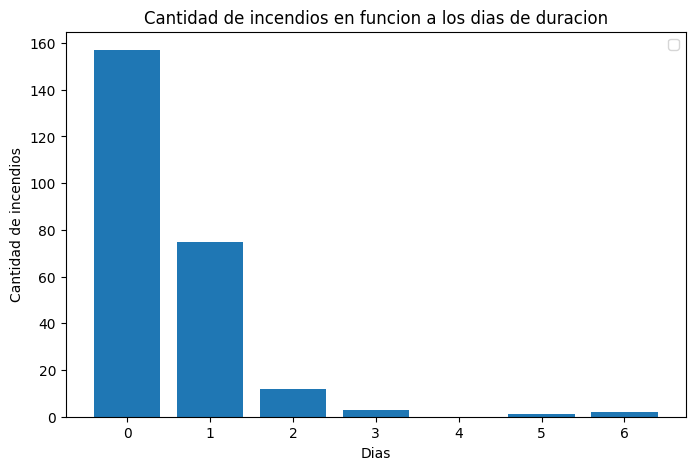

     no. Mes de origen  Mes de extincion  Mes de origen .1 Fecha origen  \
124  125          Abril            Abril                 4   2021-04-15   
167  168           Mayo             Mayo                 5   2021-05-18   
102  103          Marzo            Marzo                 3   2021-03-28   
103  104          Marzo            Marzo                 3   2021-03-29   
204  205         Agosto           Agosto                 8   2021-08-29   
..   ...            ...              ...               ...          ...   
146  147           Mayo             Mayo                 5   2021-05-05   
216  217     Septiembre       Septiembre                 9   2021-09-04   
54    55        Febrero            Marzo                 2   2021-02-27   
55    56        Febrero            Marzo                 2   2021-02-26   
226  227     Septiembre       Septiembre                 9   2021-09-15   

    Fecha Extincion  Duracion en Dias  
124      2021-04-15                 0  
167      2021-05-18

In [49]:
#¿Cuál es la duración promedio de un incendio forestal?

def d_prom(fire): #extrae la duracion promedio de los incendios en el dataframe
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Fecha Mes", "Causas", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion"]
    f_clean = fire.drop(delete, axis= 1).sort_values(by='no.')

    #Convierte el continido de las columnas a utilizar en tipo DateTime
    f_clean["Fecha origen"] = pd.to_datetime(f_clean["Fecha origen"], format='%m/%d/%Y')
    f_clean["Fecha Extincion"] = pd.to_datetime(f_clean["Fecha Extincion"], format='%m/%d/%Y')

    #Se descubrio que algunas informaciones sobre meses estaban erroneas, por lo que a continuacion se corrigen
    f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'] = f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'].apply(sum_m)

    #Crea otra columna con la diferencia en dias entre la fecha de inicio de los incendios y la fecha de extincion
    f_clean["Duracion en Dias"] = (f_clean["Fecha Extincion"] - f_clean["Fecha origen"]).dt.days

    #Grafica Duracion de cada incendio forestal
    plt.figure(figsize=(12, 6))
    plt.scatter(f_clean["no."], f_clean["Duracion en Dias"])
    plt.title("Duracion de cada incendio forestal")
    plt.xlabel("no. del incendio")
    plt.ylabel("Dias")
    plt.grid()
    prom = np.mean(f_clean["Duracion en Dias"])
    plt.axhline(y=prom, color='r', linestyle='--', label=f'Promedio de dias = {prom:.2f}')
    plt.legend(loc='upper right')
    plt.show()
    
    #Grafica Cantidad de incendios en funcion a los dias de duracion
    dat = f_clean["Duracion en Dias"].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(dat.index, dat.values)
    plt.title("Cantidad de incendios en funcion a los dias de duracion")
    plt.xlabel("Dias")
    plt.ylabel("Cantidad de incendios")
    plt.show()

    #print(f_clean.sort_values(by='Duracion en Dias'))


def sum_m(fecha):
  fecha = dt.strftime(fecha, "%m-%d-%Y")
  m, d, y = fecha.split("-")
  m = int(m) + 1
  return dt.strptime(f"{m}-{d}-{y}", "%m-%d-%Y")

d_prom(data)